# Assortativity

**Student:** Ludovico Frizziero 1178973

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as mpl
import cPickle as cp
from scipy import stats
from scipy.misc import factorial
import numpy as np
import math
from decimal import Decimal

epoch = str(1384359000000)
file_names = ('DATA\MItoMI_2013-11-13_'+epoch+'_Graph.pkl', 
              'DATA\MItoProv_2013-11-13_'+epoch+'_Graph.pkl',
              'DATA\MItoProv_2013-11-13_'+epoch+'_provIDs.pkl',
              'DATA\SMS_2013-11-13_'+epoch+'_Graph.pkl')
save_file = "DATA\Basic_Metrics.pkl"

In [2]:
with open(file_names[0], "rb") as f:
    G = cp.load(f)

frozen = nx.freeze(G)

## Test for degree correlation

In [3]:
knn_inin = nx.k_nearest_neighbors(G, source="in", target="in")
knn_outout = nx.k_nearest_neighbors(G, source="out", target="out")
knn_inout = nx.k_nearest_neighbors(G, source="in", target="out")
knn_outin = nx.k_nearest_neighbors(G, source="out", target="in")

#delete values for Knn(0) to avoid problems when plotting
del knn_inin[0]
del knn_inout[0]
del knn_outout[0]
del knn_outin[0]

		  	  slope	      intercept
Fit for in-in:  	[ 0.27644703  4.26058623]
Fit for out-out:	[ 0.23952334  4.49220496]
Fit for in-out:  	[ 0.24505229  4.52576415]
Fit for out-in:  	[ 0.2201954   4.72218603]


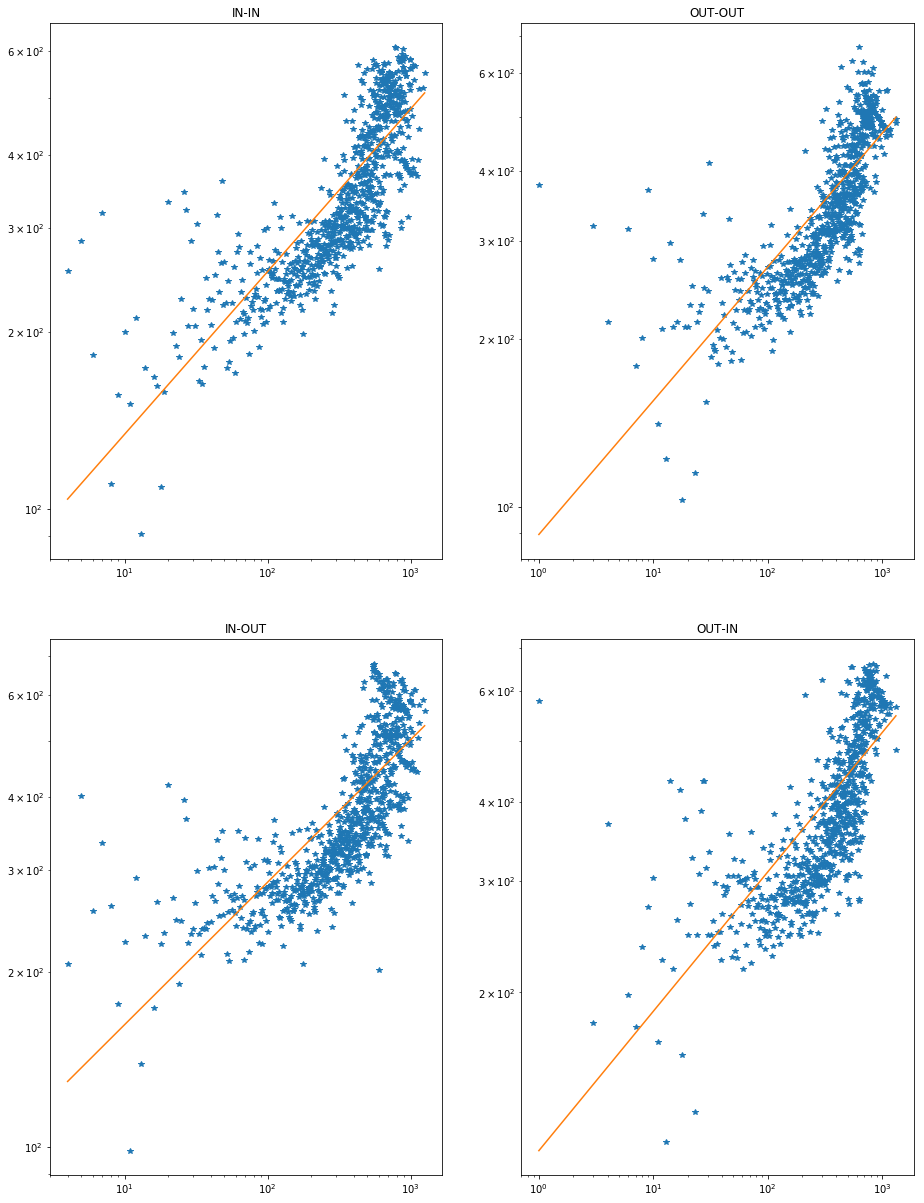

In [4]:
#----------------------------------------------------------plots----------------------------------------------------------------
def fit(knn):
    if type(knn) != dict:
        raise
    poly = np.polyfit(np.log(knn.keys()), np.log(knn.values()), 1, w=np.sqrt(knn.values()))
    x = range(min(knn.keys()), max(knn.keys())+1)
    y = [np.exp(poly[1]) * k**poly[0] for k in x]
    return poly, x, y

print "\t\t  \t", "  slope\t", "      intercept"

mpl.subplot(221)
mpl.plot(knn_inin.keys(), knn_inin.values(), "*")
poly_inin, x1, y1 = fit(knn_inin) 
print "Fit for in-in:  \t", poly_inin
mpl.title("IN-IN")
mpl.xscale("log")
mpl.yscale("log")
mpl.plot(x1, y1)

mpl.subplot(222)
mpl.plot(knn_outout.keys(), knn_outout.values(), "*")
poly_outout, x2, y2 = fit(knn_outout)
print "Fit for out-out:\t", poly_outout
mpl.title("OUT-OUT")
mpl.xscale("log")
mpl.yscale("log")
mpl.plot(x2, y2)

mpl.subplot(223)
mpl.plot(knn_inout.keys(), knn_inout.values(), "*")
poly_inout, x3, y3 = fit(knn_inout)
print "Fit for in-out:  \t", poly_inout
mpl.title("IN-OUT")
mpl.xscale("log")
mpl.yscale("log")
mpl.plot(x3, y3)

mpl.subplot(224)
mpl.plot(knn_outin.keys(), knn_outin.values(), "*")
poly_outin, x4, y4 = fit(knn_outin)
print "Fit for out-in:  \t", poly_outin
mpl.title("OUT-IN")
mpl.xscale("log")
mpl.yscale("log")
mpl.plot(x4, y4)


mpl.subplots_adjust(top=2, bottom=-2, left=-1, right=1, hspace=0.15, wspace=0.2)
mpl.show()

In [5]:
r = nx.degree_assortativity_coefficient(G)
print "Assortativity:", r

Assortativity: 0.428414642185


## Test for structural cutoff

The graph is assortative, and this property increments with the degree k insted of leveling off or diminishing, as can be seen above. Therefore structural disassortativity shouldn't be present.

- Multilink not allowed.

In [6]:
#WARNING: estimated runtime around 5 min

struct_cutoff_in = (np.mean(G.in_degree().values())*len(G))**0.5
struct_cutoff_out = (np.mean(G.out_degree().values())*len(G))**0.5
print "\n\t","in", "\t\t", "out"
print "ks\t",struct_cutoff_in, "\t",struct_cutoff_out
print "kmax\t", max(G.in_degree().values()), "\t\t", max(G.out_degree().values())


tmp = list()
print
print "\tAssortativity and [fit] after rewiring"

for i in range(10):
    F = nx.directed_configuration_model(G.in_degree().values(), G.out_degree().values(), create_using=nx.DiGraph()) #random rewiring without mutilink
    t = nx.k_nearest_neighbors(F, source="in", target="in")
    del t[0]
    poly, x, y = fit(t)
    r = nx.degree_assortativity_coefficient(F)
    print r, poly, "Lost edges:", len(G.edges()) - len(F.edges())
    tmp.append((r, poly[0], poly[1])) 
    
tmp = np.array(tmp)
print
print "\t\t\tMean values\t\t"
print np.mean(tmp[:, 0]), "[", np.mean(tmp[:, 1]), np.mean(tmp[:, 2]), "]"


	in 		out
ks	1602.93543226 	1602.93543226
kmax	1255 		1325

	Assortativity and [fit] after rewiring
-0.00928355516119 [ -4.23408209e-03   5.85800145e+00] Lost edges: 75029
-0.0101123464556 [-0.00851975  5.88379313] Lost edges: 75570
-0.00979238469704 [ -5.62179794e-03   5.86707578e+00] Lost edges: 75252
-0.010135927578 [-0.00730301  5.87679945] Lost edges: 75475
-0.00896506360792 [ -5.52917715e-03   5.86570246e+00] Lost edges: 75818
-0.00934106995283 [-0.00781429  5.87962583] Lost edges: 75524
-0.00930955806852 [ -5.58273127e-03   5.86646017e+00] Lost edges: 75498
-0.00936468386148 [ -2.88993429e-03   5.85063825e+00] Lost edges: 75576
-0.0083150681827 [ -3.05959368e-03   5.85112545e+00] Lost edges: 75838
-0.00937365077123 [-0.00648316  5.87169557] Lost edges: 75471

			Mean values		
-0.00939933083366 [ -0.00570375272338 5.86709175538 ]


- Multilink allowed

In [7]:
#WARNING: estimated runtime around 30 min

tmp = list()
print
print "\tAssortativity and [fit] after rewiring"

for i in range(5):
    F = nx.directed_configuration_model(G.in_degree().values(), G.out_degree().values()) #random rewiring with multilink
    t = nx.k_nearest_neighbors(F, source="in", target="in")
    del t[0]
    poly, x, y = fit(t)
    r = nx.degree_assortativity_coefficient(F)
    print r, poly, "Lost edges:", len(G.edges()) - len(F.edges())
    tmp.append((r, poly[0], poly[1])) 
    
tmp = np.array(tmp)
print
print "\t\t\tMean values\t\t"
print np.mean(tmp[:, 0]), "[", np.mean(tmp[:, 1]), np.mean(tmp[:, 2]), "]"


	Assortativity and [fit] after rewiring
0.000152932027112 [-0.0238191  5.9763825] Lost edges: 0
0.00194778275935 [-0.02247157  5.96929654] Lost edges: 0
0.000929002106454 [-0.02178345  5.96461457] Lost edges: 0
0.000106779404366 [-0.02533607  5.98556633] Lost edges: 0
0.000392331907741 [-0.02288491  5.97183994] Lost edges: 0

			Mean values		
0.000705765641005 [ -0.0232590221486 5.9735399781 ]
